In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torch.utils.data import Dataset, DataLoader, TensorDataset
from torchvision import transforms, datasets

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Q2

In [ ]:
def createDataSet_2():
    x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y = np.array([[1], [0], [0], [1]])
    return x, y

x, y = createDataSet_2()

class loadData(Dataset):
    def __init__(self, x, y):
        super(loadData, self).__init__()
        self.x = x
        self.y = y
    def __len__(self):
        return len(self.x)
    def __getitem__(self, idx):
        return torch.tensor(self.x[idx], dtype=torch.float), torch.tensor(self.y[idx], dtype=torch.float)

data = loadData(x, y)
dataloader = DataLoader(data, batch_size=1, shuffle=False)

In [11]:
ones = torch.ones(1, 1)

class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.l1 = nn.Linear(3, 2)
        self.l2 = nn.Linear(3, 1)
    def forward(self, x):
        x = self.l1(x)
        x = torch.cat((x, ones), dim=1)
        x = self.l2(x)
        return x

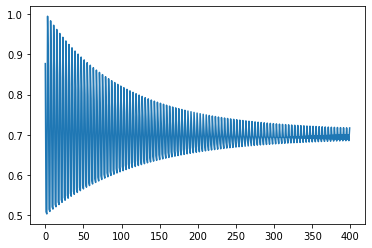

In [12]:
model = NN()
loss_his = []
learning_rate = 10e-3

criterion = nn.BCEWithLogitsLoss(reduction='mean')
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

def train(epoch):
    loss_run = 0
    for batch_idx, data in enumerate(dataloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        loss_run += loss.item()
        loss_his.append(loss_run)
        loss_run =  0

for epoch in range(100):
    train(epoch)
plt.plot(loss_his)

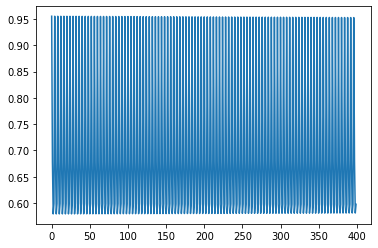

In [13]:
model = NN()
loss_his = []
learning_rate = 10e-5
epoch = 100

criterion = torch.nn.BCEWithLogitsLoss(reduction="mean")
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

def train(epoch):
    running_loss = 0.0
    loss_run = 0
    for batch_idx, data in enumerate(dataloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        loss_run += loss.item()
        loss_his.append(loss_run)
        loss_run =  0
    

if __name__=="__main__":
    for i in range(epoch):
        train(epoch)
    plt.plot(loss_his)

### Q3

In [14]:
class NN3(nn.Module):
    def __init__(self):
        super(NN3, self).__init__()
        self.l1 = nn.Linear(3, 3)
        self.l2 = nn.Linear(4, 1)
    def forward(self, x):
        x = self.l1(x)
        x = torch.cat((x, ones), dim=1)
        x = self.l2(x)
        return x

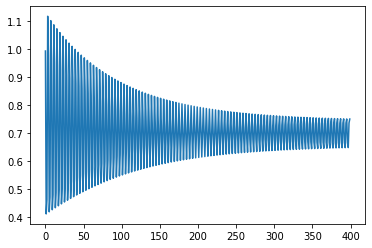

In [15]:
model = NN3()
loss_his = []
learning_rate = 10e-3
epoch = 100

criterion = torch.nn.BCEWithLogitsLoss(reduction="mean")
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

def train(epoch):
    running_loss = 0.0
    loss_run = 0
    for batch_idx, data in enumerate(dataloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        loss_run += loss.item()
        loss_his.append(loss_run)
        loss_run =  0
    

if __name__=="__main__":
    for i in range(epoch):
        train(epoch)
    plt.plot(loss_his)

### Q4

In [4]:
default = pd.read_csv('data/Default.txt', sep='\t', names=['x1', 'x2', 'y'])
default = pd.get_dummies(default, columns=['y'], drop_first=True)

In [5]:
x = default.drop(columns=["y_Yes"]).to_numpy()
x = np.concatenate((x, np.array([[1] for i in range(x.shape[0])])), axis=1)
y = default["y_Yes"].to_numpy().reshape(-1, 1)

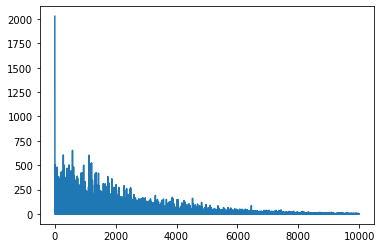

In [6]:
ones = torch.ones((1, 1))

class Loader(Dataset):  
    def __init__(self, x, y):
        super(Loader, self).__init__()
        self.x = x
        self.y = y

    def __getitem__(self, idx):
        return torch.tensor(self.x[idx, :], dtype=torch.float32), torch.tensor(self.y[idx], dtype=torch.float64)
    
    def __len__(self):
        return len(self.x)

data = Loader(x, y)
dataloader = DataLoader(data, batch_size=1, shuffle=True)

class NN4(torch.nn.Module):
    def __init__(self):
        super(NN4, self).__init__()
        self.l1 = torch.nn.Linear(3, 2)
        self.l2 = torch.nn.Linear(3, 1)
        
    def forward(self, x):
        x = self.l1(x)
        x = torch.cat((x, ones), dim=1)
        x = self.l2(x)
        return x

model = NN4()
loss_his = []
learning_rate = 10e-7
epoch = 100

criterion = torch.nn.BCEWithLogitsLoss(reduction="mean")
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

def train(epoch):
    loss_run = 0
    for batch_idx, data in enumerate(dataloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        loss_run += loss.item()
        loss_his.append(loss_run)
        loss_run =  0
    

if __name__=="__main__":
    for i in range(epoch):
        train(epoch)
    plt.plot(loss_his)

### Q5

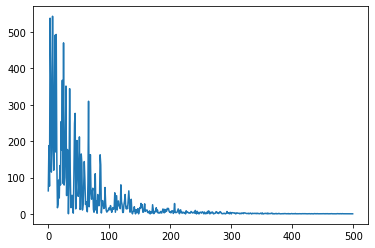

In [7]:
batch_size = 10
ones = torch.ones((batch_size, 1))

class Loader(Dataset):  
    def __init__(self, x, y):
        super(Loader, self).__init__()
        self.x = x
        self.y = y

    def __getitem__(self, idx):
        return torch.tensor(self.x[idx, :], dtype=torch.float32), torch.tensor(self.y[idx], dtype=torch.float64)
    
    def __len__(self):
        return len(self.x)

data = Loader(x, y)
dataloader = DataLoader(data, batch_size=batch_size, shuffle=True)

class NN5(torch.nn.Module):
    def __init__(self):
        super(NN5, self).__init__()
        self.l1 = torch.nn.Linear(3, 2)
        self.l2 = torch.nn.Linear(3, 1)

    def forward(self, x):
        x = self.l1(x)
        x = torch.cat((x, ones), dim=1)
        x = self.l2(x)
        return x

model = NN5()
loss_his = []
learning_rate = 10e-6
epoch = 50

criterion = torch.nn.BCEWithLogitsLoss(reduction="mean")
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

def train(epoch):
    loss_run = 0
    for batch_idx, data in enumerate(dataloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        loss_run += loss.item()
        loss_his.append(loss_run)
        loss_run =  0

if __name__=="__main__":
    for i in range(epoch):
        train(epoch)
    plt.plot(loss_his)

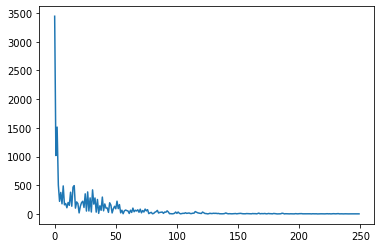

In [8]:
batch_size = 20
ones = torch.ones((batch_size, 1))

class Loader(Dataset):  
    def __init__(self, x, y):
        super(Loader, self).__init__()
        self.x = x
        self.y = y

    def __getitem__(self, idx):
        return torch.tensor(self.x[idx, :], dtype=torch.float32), torch.tensor(self.y[idx], dtype=torch.float64)
    
    def __len__(self):
        return len(self.x)

data = Loader(x, y)
dataloader = DataLoader(data, batch_size=batch_size, shuffle=True)

class NN5(torch.nn.Module):
    def __init__(self):
        super(NN5, self).__init__()
        self.l1 = torch.nn.Linear(3, 2)
        self.l2 = torch.nn.Linear(3, 1)

    def forward(self, x):
        x = self.l1(x)
        x = torch.cat((x, ones), dim=1)
        x = self.l2(x)
        return x

model = NN5()
loss_his = []
learning_rate = 10e-6
epoch = 50

criterion = torch.nn.BCEWithLogitsLoss(reduction="mean")
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

def train(epoch):
    loss_run = 0
    for batch_idx, data in enumerate(dataloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        loss_run += loss.item()
        loss_his.append(loss_run)
        loss_run =  0

if __name__=="__main__":
    for i in range(epoch):
        train(epoch)
    plt.plot(loss_his)

### Q6

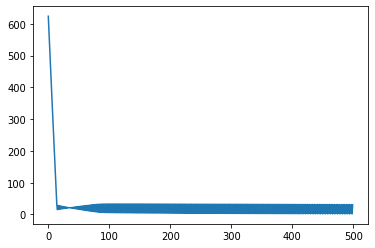

In [42]:
x = default.drop(columns=["y_Yes"]).to_numpy()
y = default["y_Yes"].to_numpy().reshape(-1, 1)

batch_size = len(x)

class Loader(Dataset):  
    def __init__(self, x, y):
        super(Loader, self).__init__()
        self.x = x
        self.y = y

    def __getitem__(self, idx):
        return torch.tensor(self.x[idx, :], dtype=torch.float32), torch.tensor(self.y[idx], dtype=torch.float64)
    
    def __len__(self):
        return len(self.x)

data = Loader(x, y)
dataloader = DataLoader(data, batch_size=batch_size, shuffle=True)

class NN6(torch.nn.Module):
    def __init__(self):
        super(NN6, self).__init__()
        self.l1 = torch.nn.Linear(2, 5)
        self.l2 = torch.nn.Linear(5, 5)
        self.l3 = torch.nn.Linear(5, 1)
        
    def forward(self, x):
        x = F.relu(self.l1(x))
        x = F.relu(self.l2(x))
        x = self.l3(x)
        return x

model = NN6()
loss_his = []
learning_rate = 10e-7
epoch = 500

criterion = torch.nn.BCEWithLogitsLoss(reduction="mean")
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

def train(epoch):
    loss_run = 0
    for batch_idx, data in enumerate(dataloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        loss_run += loss.item()
        loss_his.append(loss_run)
        loss_run =  0
    

if __name__=="__main__":
    for i in range(epoch):
        train(epoch)
    plt.plot(loss_his)

### Q7

In [50]:
ads = pd.read_csv("data/Advertising.csv", header=0)
x = ads.drop(columns=["sales"]).to_numpy()
x = np.concatenate((x, np.array([[1] for i in range(x.shape[0])])), axis=1)
y = ads["sales"].to_numpy().reshape(-1, 1)

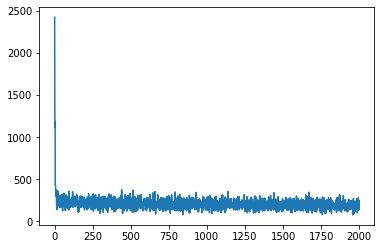

In [52]:
batch_size = 10

class Loader(Dataset):
    def __init__(self, x, y):
        super(Loader, self).__init__()
        self.x = x
        self.y = y

    def __getitem__(self, idx):
        return torch.tensor(self.x[idx, :], dtype=torch.float32), torch.tensor(self.y[idx], dtype=torch.float)
    
    def __len__(self):
        return len(self.x)

data = Loader(x, y)
dataloader = DataLoader(data, batch_size=batch_size, shuffle=True)

ones = torch.ones((batch_size, 1))

class NN7(torch.nn.Module):
    def __init__(self):
        super(NN7, self).__init__()
        self.l1 = torch.nn.Linear(4, 3)
        self.l2 = torch.nn.Linear(4, 1)

    def forward(self, x):
        x = F.relu(self.l1(x))
        x = torch.cat((x, ones), dim=1)
        x = self.l2(x)
        return x

model = NN7()
loss_his = []
learning_rate = 10e-6
epoch = 100

criterion = torch.nn.MSELoss(reduction="mean")
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

def train(epoch):
    loss_run = 0
    for batch_idx, data in enumerate(dataloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        loss_run += loss.item()
        loss_his.append(loss_run)
        loss_run =  0

if __name__=="__main__":
    for i in range(epoch):
        train(epoch)
    plt.plot(loss_his)